In [60]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import seaborn as sns
sns.set(style="darkgrid")

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

from montFunctions import rfeSelctor

In [61]:
data_path = r'C:\Users\steph\OneDrive\Documents\Data\Network Intrusion'
train = pd.read_csv(f'{data_path}\\Train_data.csv')
test = pd.read_csv(f'{data_path}\\Test_data.csv')

In [62]:
train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [63]:
test.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [65]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [66]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,25192.0,305.054104,2.686556e+03,0.0,0.00,0.00,0.00,42862.0
src_bytes,25192.0,24330.628215,2.410805e+06,0.0,0.00,44.00,279.00,381709090.0
dst_bytes,25192.0,3491.847174,8.883072e+04,0.0,0.00,0.00,530.25,5151385.0
land,25192.0,0.000079,8.909946e-03,0.0,0.00,0.00,0.00,1.0
wrong_fragment,25192.0,0.023738,2.602208e-01,0.0,0.00,0.00,0.00,3.0
urgent,25192.0,0.000040,6.300408e-03,0.0,0.00,0.00,0.00,1.0
hot,25192.0,0.198039,2.154202e+00,0.0,0.00,0.00,0.00,77.0
num_failed_logins,25192.0,0.001191,4.541818e-02,0.0,0.00,0.00,0.00,4.0
logged_in,25192.0,0.394768,4.888105e-01,0.0,0.00,0.00,1.00,1.0
num_compromised,25192.0,0.227850,1.041735e+01,0.0,0.00,0.00,0.00,884.0


#### Label balance

In [67]:
# Attack Class Distribution
train['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

#### Split features and target

In [68]:
X_train = train.drop(columns='class')
y_train = train['class']

In [69]:
X_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,udp,other,SF,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,tcp,private,S0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,tcp,http,SF,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,255,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00


In [70]:
# During pre-processing new service type is found in test and not train, Will now remove all rows with this service (its only one)
train_servs = list(X_train['service'].unique())
test_servs = list(test['service'].unique())
diff = list(set(test_servs) - set(train_servs))[0]
test = test[test['service'] != diff]
test.shape
#diff

(22543, 41)

#### Feature scaling

In [71]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder

# Scale numerical fields
scaler = StandardScaler()
# extract numerical attributes and scale it to have zero mean and unit variance  
cols = X_train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(X_train.select_dtypes(include=['float64','int64']))
# We only transform and do not fit to the test data, this would cause data leakage
sc_test = scaler.transform(test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

# Encode categorical fields
encoder = OrdinalEncoder()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = X_train.select_dtypes(include=['object']).columns
cat_train = encoder.fit_transform(X_train.select_dtypes(include=['object']))
# We only transform and do not fit to the test data, this would cause data leakage
cat_test = encoder.transform(test.select_dtypes(include=['object']))

# turn the result back to a dataframe
cat_traindf = pd.DataFrame(cat_train, columns = cols)
cat_testdf = pd.DataFrame(cat_test, columns = cols)

# X_train as one df
X_train = pd.concat([sc_traindf, cat_traindf], axis=1)
X_test = pd.concat([sc_testdf, cat_testdf], axis=1)

# Encode label
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [72]:
print(f"The shape of the features is {X_train.shape} for training and {X_test.shape} for testing")

The shape of the features is (25192, 41) for training and (22543, 41) for testing


#### Feature selection

<AxesSubplot:xlabel='feature'>

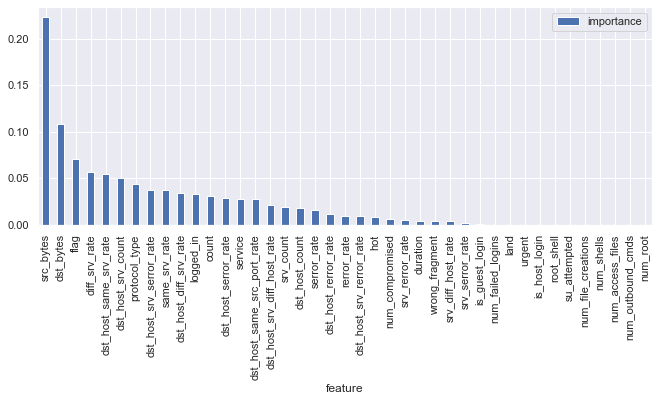

In [73]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

# fit random forest classifier on the training set
rfc.fit(X_train, y_train)
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':X_train.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar()

In [74]:
# Features to preserve n cumulative importsance
importances['cumu_imp'] = importances['importance'].cumsum()
orig_feats = len(importances)
n_importance = 0.95
importances = importances[importances['cumu_imp']<=n_importance]
reduced_feats = len(importances)
rfc_feats = list(importances.index)
print(f"Reduction of {(orig_feats-reduced_feats)/orig_feats} or {reduced_feats} features instead of {orig_feats}")
importances

Reduction of 0.5121951219512195 or 20 features instead of 41


,importance,cumu_imp
feature,,
src_bytes,0.223,0.223
dst_bytes,0.108,0.331
flag,0.071,0.402
diff_srv_rate,0.057,0.459
dst_host_same_srv_rate,0.054,0.513
dst_host_srv_count,0.050,0.563
protocol_type,0.044,0.607
dst_host_srv_serror_rate,0.037,0.644
same_srv_rate,0.037,0.681


In [75]:
# Recursive feature elimination set to the same number of features givesrfe_
rfe_feats = rfeSelctor(X_train, y_train, len(rfc_feats))
print(f"The features in rfe that are not in the rf feature selection are: {set(rfc_feats)-set(rfe_feats)}")
print("--------------------------------")
print(f"The features in rfe that are not in the rf feature selection are: {set(rfe_feats)-set(rfc_feats)}")

The features in rfe that are not in the rf feature selection are: {'serror_rate'}
--------------------------------
The features in rfe that are not in the rf feature selection are: {'hot'}


This gives us a little confidence that the features selected by both methods are similar

In [76]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(X_train)
X_train_pca = pd.DataFrame(pca.transform(X_train))
print(f"PCA at 0.95 retained variance suggests {len(X_train_pca.columns)} features")

PCA at 0.95 retained variance suggests 8 features


#### Creating a validation set for model selection

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20, random_state=2, stratify=y_train)

print(f"The shape of the training set is {X_train.shape} features and {y_train.shape} labels")
print("------------------------------------------------")
print(f"The shape of the validation set is {X_valid.shape} features and {y_valid.shape} labels")

The shape of the training set is (20153, 41) features and (20153,) labels
------------------------------------------------
The shape of the validation set is (5039, 41) features and (5039,) labels


#### Fitting several candidate models

In [78]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, y_train); 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, y_train);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, y_train)
            
# Train Decision Tree Model
DTC_Classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, y_train)

# Train Decision Tree Model
RFC_Classifier = RandomForestClassifier(criterion='entropy', random_state=0)
RFC_Classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores = cross_val_score(v, X_valid, y_valid, cv=5)
    y_pred = v.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    conf_mat = confusion_matrix(y_valid, y_pred)
    classification = classification_report(y_valid, y_pred)
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", conf_mat)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9071247300641542

Model Accuracy:
 0.9081166898194086

Confusion matrix:
 [[1999  350]
 [ 113 2577]]

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.85      0.90      2349
           1       0.88      0.96      0.92      2690

    accuracy                           0.91      5039
   macro avg       0.91      0.90      0.91      5039
weighted avg       0.91      0.91      0.91      5039



============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9914676628678615

Model Accuracy:
 0.9958325064496923

Confusion matrix:
 [[2339   10]
 [  11 2679]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2349
           1       1.00      1.00     